# 'Heart Disease Prediction model'
In this notebook we are trying to predict the heart disease on the basis of given information in the dataset


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, andLong Beach V.
It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a 
subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. 
It is integer valued 0 = no disease and 1 = disease.
Link for the dataset:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,f1_score


In [14]:
df = pd.read_csv('heart_disease_uci.csv')

In [15]:
# Column Descriptions:
# id (Unique id for each patient)
# age (Age of the patient in years)
# origin (place of study)
# sex (Male/Female)
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# chol (serum cholesterol in mg/dl)
# fbs (if fasting blood sugar > 120 mg/dl)
# restecg (resting electrocardiographic results)
# -- Values: [normal, stt abnormality, lv hypertrophy]
# thalach: maximum heart rate achieved
# exang: exercise-induced angina (True/ False)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by fluoroscopy
# thal: [normal; fixed defect; reversible defect]
# num: the predicted attribute

In [16]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [17]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [18]:
df.rename(columns={'cp':'chest_pain','trestbps':'restbp', 'num':'hd'}, inplace=True)

In [19]:
df

,id,age,sex,dataset,chest_pain,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,hd
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
df.isnull().sum()

id              0
age             0
sex             0
dataset         0
chest_pain      0
restbp         59
chol           30
fbs            90
restecg         2
thalch         55
exang          55
oldpeak        62
slope         309
ca            611
thal          486
hd              0
dtype: int64

In [21]:
df.drop(['id','dataset'],axis=1, inplace=True)

In [22]:
df['hd'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: hd, dtype: int64

In [23]:
#here 0 represent 'no heart disease' and 1 and more than 1 represent different level of heart disesase'
#so we convert more than 1 to 1 to represent 'heart disease'

In [24]:
flt = df['hd']>=1 
df[flt] = df[flt].replace([2,3,4], 1)

In [25]:
df['hd'].value_counts()

1    509
0    411
Name: hd, dtype: int64

In [30]:
#handling null values

In [31]:
df.isnull().mean()*100

age            0.000000
sex            0.000000
chest_pain     0.000000
restbp         6.413043
chol           3.260870
fbs            9.782609
restecg        0.217391
thalch         5.978261
exang          5.978261
oldpeak        6.739130
slope         33.586957
ca            66.413043
thal          52.826087
hd             0.000000
dtype: float64

In [32]:
#check the length of missing values of columns which are less than 10%
flt = (df['restbp'].isnull() | df['chol'].isnull() | df['restecg'].isnull() | 
       df['thalch'].isnull() | df['exang'].isnull() | df['oldpeak'].isnull())
len(df[flt])/len(df)*100

10.326086956521738

In [33]:
# so we can drop these columns as these are around 10% of the whole data
df.dropna(subset=['restbp','chol','restecg','thalch','exang','oldpeak'], inplace=True)

In [34]:
df.isnull().sum()

age             0
sex             0
chest_pain      0
restbp          0
chol            0
fbs            85
restecg         0
thalch          0
exang           0
oldpeak         0
slope         226
ca            517
thal          400
hd              0
dtype: int64

In [35]:
# df['fbs'].value_counts()

# distribution of all the numerical columns

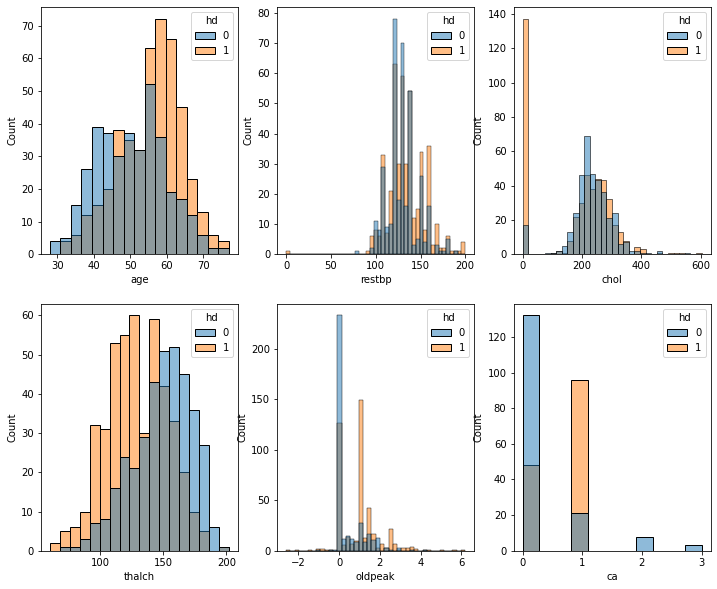

In [37]:
cols = ['age','restbp','chol','thalch','oldpeak','ca']
fig = plt.figure(figsize=(12,10))
for i,col in enumerate(cols):
    ax = fig.add_subplot(2,3,i+1)
    sns.histplot(df,x=col,hue='hd', ax=ax)

# Categorical Columns

In [38]:
#average age of male and female to get heart disease

In [39]:
female_avg = df.loc[df['hd']==1].groupby('sex')[['age']].mean().loc['Female'].values[0]
male_avg = df.loc[df['hd']==1].groupby('sex')[['age']].mean().loc['Male'].values[0]

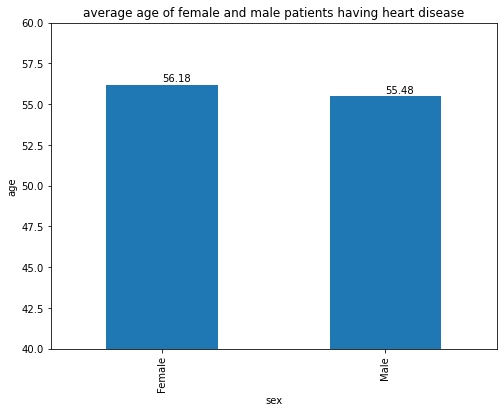

In [40]:
plt.figure(figsize=(8,6))
ax = df.loc[df['hd']==1].groupby('sex')['age'].mean().plot(kind='bar',
                                                      title='average age of female and male patients having heart disease'
                                                        )
ax.set_ylabel('age')
ax.set_ylim(40,60)
plt.annotate(f'{female_avg}',(0,female_avg+0.2))
plt.annotate(f'{round(male_avg,2)}',(1,male_avg+0.2));

# what percentage of patients  are female and male

In [41]:
df_gender = df[df['hd']==1][['sex']].value_counts(normalize=True).reset_index()
df_gender = df_gender.rename(columns={0:'perc'})
df_gender = df_gender.pivot_table(columns='sex',values='perc')
df_gender

sex,Female,Male
perc,0.110132,0.889868


In [42]:
female_perc =df_gender['Female'].values[0]
male_perc =df_gender['Male'].values[0]

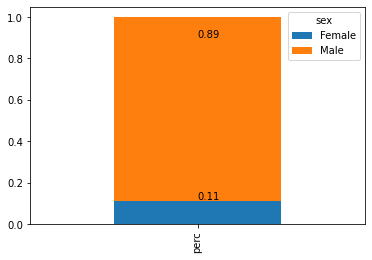

In [43]:
df_gender.plot(kind='bar',stacked=True)
plt.annotate(f'{round(male_perc,2)}',(0,male_perc+0.01))
plt.annotate(f'{round(female_perc,2)}',(0,female_perc+0.01));

In [63]:
# This shows almost 90% of the patients are Male

# Relationship in Categorical columns

In [47]:
cat_columns = ['sex','chest_pain','fbs','restecg','exang','slope','thal']

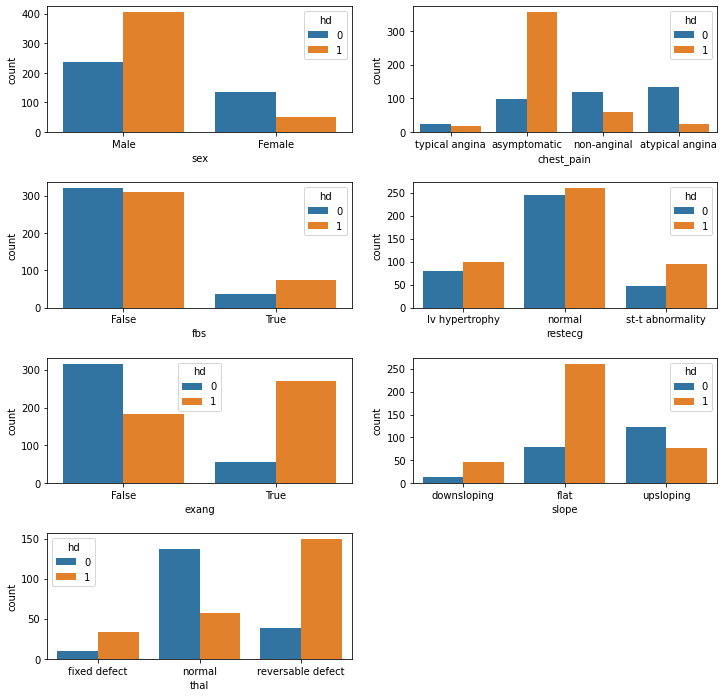

In [54]:
fig= plt.figure(figsize=(12,12))
for i,col in enumerate(cat_columns):
    ax=fig.add_subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 0.4)
    sns.countplot(data=df,x=col,hue='hd', ax=ax)

In [26]:
#impute 'fbs' with most_frequent value
mode = df['fbs'].mode()[0]
df['fbs'] = df['fbs'].fillna(mode)

In [27]:
df.isnull().sum()

age             0
sex             0
chest_pain      0
restbp          0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope         226
ca            517
thal          400
hd              0
dtype: int64

In [59]:
df['slope'].value_counts()

flat           339
upsloping      199
downsloping     61
Name: slope, dtype: int64

<AxesSubplot:>

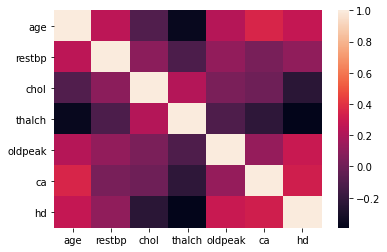

In [62]:
sns.heatmap(df.corr())

In [ ]:
# Heatmap shows 'thalch' and 'chol' are negatively correlated

In [58]:
df['ca'].value_counts()

0.0    180
1.0    117
2.0      8
3.0      3
Name: ca, dtype: int64

In [60]:
df['thal'].value_counts()

normal               194
reversable defect    187
fixed defect          44
Name: thal, dtype: int64

In [42]:
# Impute missing values with most frequesnt in slope, ca and thal column
mode_slope = df['slope'].mode()[0]
# mode_slope
df['slope'] = df['slope'].fillna(mode_slope)

In [43]:
mode_ca = df['ca'].mode()[0]
# mode_ca
df['ca'] = df['ca'].fillna(mode_ca)

In [44]:
mode_thal = df['thal'].mode()[0]
# mode_thal
df['thal'] = df['thal'].fillna(mode_thal)

In [45]:
df.isnull().sum()

age           0
sex           0
chest_pain    0
restbp        0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
hd            0
dtype: int64

In [46]:
df['fbs'].value_counts()

False    714
True     111
Name: fbs, dtype: int64

### Here we will use 5 models : DecisionTreeClassifier, RandomForest and GradientBoostingClassifier 
### Logistic Regression and SVM to predict whether a given person has got heart disease or not wrt given information

In [47]:
X=df.drop('hd',axis=1)
y=df['hd']

In [48]:
#check balance of classes in the Dataset

In [49]:
np.sum(y==1)/len(X)

0.5503030303030303

In [50]:
X = pd.get_dummies(X, columns=['sex','chest_pain','fbs','restecg','exang','slope','thal'] , drop_first=True)

In [51]:
X

,age,restbp,chol,thalch,oldpeak,ca,sex_Male,chest_pain_atypical angina,chest_pain_non-anginal,chest_pain_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,1,0,0,1,1,0,0,0,0,0,0,0
1,67,160.0,286.0,108.0,1.5,1.0,1,0,0,0,0,0,0,1,1,0,1,0
2,67,120.0,229.0,129.0,2.6,1.0,1,0,0,0,0,0,0,1,1,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,1,0,1,0,0,1,0,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,158.0,170.0,138.0,0.0,0.0,1,0,0,0,0,0,1,1,1,0,1,0
914,46,134.0,310.0,126.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,1,0
915,54,127.0,333.0,154.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,1,0
917,55,122.0,223.0,100.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0


In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [393]:
X_train.shape

(660, 18)

# Decision Tree

In [394]:

dt = DecisionTreeClassifier()

In [395]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [396]:
y_pred = dt.predict(X_test)

In [397]:
accuracy_score(y_test, y_pred)

0.7393939393939394

In [398]:
confusion_matrix(y_test, y_pred)

array([[50, 23],
       [20, 72]])

In [399]:
#get best value of alpha(learning rate) in order to get the low variance model by pruning the decision tree

In [503]:
path = dt.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00064097, 0.00247475, 0.00262542, 0.00312468,
        0.00371212, 0.00375   , 0.00473747, 0.00489802, 0.00618558,
        0.0085716 , 0.01742554, 0.03244265, 0.05598984, 0.10358981]),
 'impurities': array([0.24512999, 0.24577095, 0.2482457 , 0.25087112, 0.2539958 ,
        0.25770792, 0.26145792, 0.26619539, 0.27109341, 0.27727899,
        0.28585059, 0.30327613, 0.33571878, 0.39170862, 0.49529844])}

In [504]:
ccp_alphas = path['ccp_alphas']
len(ccp_alphas)

15

In [505]:
ccp_alphas[:-1]

array([0.        , 0.00064097, 0.00247475, 0.00262542, 0.00312468,
       0.00371212, 0.00375   , 0.00473747, 0.00489802, 0.00618558,
       0.0085716 , 0.01742554, 0.03244265, 0.05598984])

In [506]:
#finding the best value of alpha by plotting the graph

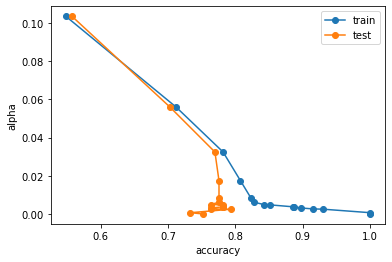

In [507]:
accuracy_train_pred = []
accuracy_test_pred = []
alpha = []

for i in path['ccp_alphas']:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    alpha.append(i)
    accuracy_train_pred.append(accuracy_score(y_train,train_pred))
    accuracy_test_pred.append(accuracy_score(y_test,test_pred))
    
#plot accuracy score 
plt.plot(accuracy_train_pred, alpha, marker='o', label='train')
plt.plot(accuracy_test_pred, alpha, marker='o', label='test')
plt.xlabel('accuracy')
plt.ylabel('alpha')
plt.legend()
    

In [508]:
## CV score to find best value of alpha

In [509]:
scores = []
std = []
alpha = []

for i in path['ccp_alphas']:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    score = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5)
    scores.append(round(np.sum(score)/5,2))
    std.append(np.std(score))
    alpha.append(i)


In [510]:
alpha_df = pd.DataFrame({'score':scores,
                        'std':std,
                        'alpha':alpha})

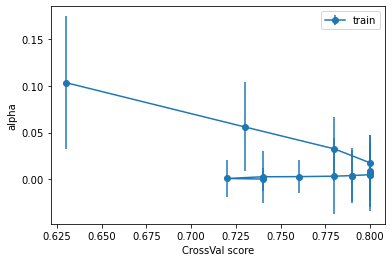

In [511]:
#plot accuracy score 
alpha_df.plot(x='score', y='alpha', marker='o',yerr='std', label='train')
plt.xlabel('CrossVal score')
plt.ylabel('alpha')
plt.legend()

In [409]:
#from above both the graphs it seems alpha = 0.02 is a good value

In [410]:
#parameters for DT  
param_dt = {'criterion':['gini','entropy'],
    'max_depth':[None,3,4,5],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2],
    'max_features':[None,2,],
    'random_state':[42],
    'max_leaf_nodes':[None,2]}

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
#tune parameters of Decision tree

gd = GridSearchCV(estimator=dt, param_grid=param_dt)

In [66]:
gd.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [None, 2], 'max_leaf_nodes': [None, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5], 'random_state': [42]})

In [67]:
y_pred = gd.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.793939393939394

In [69]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [587]:
#making final tree
dt = DecisionTreeClassifier(criterion='gini',
 max_depth= 4,
 max_features=None,
 max_leaf_nodes= None,
 min_samples_leaf= 2,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 ccp_alpha=0.02,                      
 random_state= 42)

In [588]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=4, min_samples_leaf=2,
                       random_state=42)

In [591]:
y_pred = dt.predict(X_test)
# y_pred

In [592]:
acc_dt = dt.score(X_test, y_test)
acc_dt

0.7757575757575758

In [593]:
from sklearn.model_selection import cross_val_score

In [594]:
dt_train_score = np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error' ))
dt_test_score = np.mean(cross_val_score(dt, X_test, y_test, cv=5, scoring='neg_mean_squared_error' ))

dt_acc = accuracy_score(y_pred, y_test)

dt_train_score, dt_test_score,dt_acc

(-0.20454545454545453, -0.28484848484848485, 0.7757575757575758)

In [595]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        73
           1       0.78      0.84      0.81        92

    accuracy                           0.78       165
   macro avg       0.78      0.77      0.77       165
weighted avg       0.78      0.78      0.77       165



# Random Forest Classifier

In [423]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [424]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8181818181818182

In [425]:
rf.feature_importances_

array([0.09251105, 0.08013835, 0.14967924, 0.13708037, 0.09920985,
       0.02984925, 0.04943424, 0.06734625, 0.03937071, 0.0127087 ,
       0.01438148, 0.01786394, 0.01418208, 0.10635718, 0.01497849,
       0.01687109, 0.03229396, 0.02574377])

In [426]:
#tune parameters for RandomForest
param_rf = { 'n_estimators':[50,100],
    'criterion':['gini'],
    'max_depth':[None,2,3,5],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2],
    'max_features':['sqrt'],
    'bootstrap':[True],
    'random_state':[42],
    'max_samples':[None,.50,.75],
    'ccp_alpha':[0.0,0.1]
           }


In [188]:
gd_rf = GridSearchCV(estimator=rf, param_grid=param_rf)

In [189]:
gd_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0, 0.1],
                         'criterion': ['gini'], 'max_depth': [None, 2, 3, 5],
                         'max_features': ['sqrt'],
                         'max_samples': [None, 0.5, 0.75],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100], 'random_state': [42]})

In [190]:
gd_rf.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

In [191]:
y_pred = gd_rf.predict(X_test)

In [192]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [596]:
#make final Random Forest with best params
rf = RandomForestClassifier(bootstrap= True,
 criterion='gini',
 ccp_alpha= 0.0,
 max_depth= None,
 max_features='sqrt',
 max_leaf_nodes= None,
 max_samples=None,
 min_samples_leaf=1,
 min_samples_split=4,
 n_estimators=100,
 random_state=42)

In [597]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=4, random_state=42)

In [598]:
y_pred = rf.predict(X_test)


In [599]:
rf_train_score = np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error' ))
rf_test_score = np.mean(cross_val_score(rf, X_test, y_test, cv=5, scoring='neg_mean_squared_error' ))

rf_acc = accuracy_score(y_pred, y_test)

rf_train_score, rf_test_score,rf_acc

(-0.17424242424242423, -0.22424242424242422, 0.8181818181818182)

In [600]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        73
           1       0.81      0.88      0.84        92

    accuracy                           0.82       165
   macro avg       0.82      0.81      0.81       165
weighted avg       0.82      0.82      0.82       165



/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


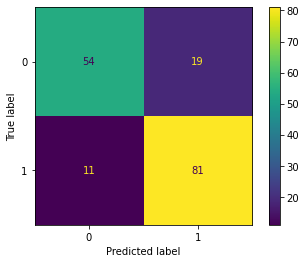

In [601]:
plot_confusion_matrix(rf,X_test,y_test)

## GradientBoostingClassifier

In [437]:
from sklearn.ensemble import GradientBoostingClassifier

In [438]:
gbs = GradientBoostingClassifier()

In [439]:
gbs.fit(X_train, y_train)

GradientBoostingClassifier()

In [440]:
gbs.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [441]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [672]:
param_grid = {
    'learning_rate':[0.1,0.2],
    'n_estimators':[50,100],
    'max_depth':[3,4,5],
    'max_features':[None,2,3],
    'ccp_alpha':[0.0,0.1]
}

In [673]:
gd = GridSearchCV(estimator=gbs, param_grid=param_grid, cv=5)

In [674]:
gd.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_features': [None, 2, 3],
                         'n_estimators': [50, 100]})

In [675]:
gd.best_params_

{'ccp_alpha': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 50}

In [687]:
gd.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [676]:
y_pred = gd.predict(X_test)

In [677]:
accuracy_score(y_test, y_pred)

0.8363636363636363

In [678]:
#final GDboost model
gbs = GradientBoostingClassifier(ccp_alpha= 0.0,
 learning_rate= 0.1,
 max_depth= 3,
 max_features= None,
 n_estimators= 50,
 random_state=42)
 

In [679]:
gbs.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

# Feature Importanc of GradientBoosting Model

In [680]:
gbs.feature_importances_

array([0.03863484, 0.03055998, 0.19122469, 0.08688358, 0.08467681,
       0.06053187, 0.04725167, 0.07239762, 0.07534346, 0.0199198 ,
       0.00236468, 0.00642152, 0.00268635, 0.19781297, 0.00223605,
       0.01230452, 0.06840268, 0.0003469 ])

In [681]:
lst = zip(X_train.columns,gbs.feature_importances_)
features = pd.DataFrame(list(lst), columns=['Feature','Importances'])
features = features.sort_values(by='Importances').set_index('Feature')
features

,Importances
Feature,
thal_reversable defect,0.000347
slope_flat,0.002236
fbs_True,0.002365
restecg_st-t abnormality,0.002686
restecg_normal,0.006422
slope_upsloping,0.012305
chest_pain_typical angina,0.019920
restbp,0.030560
age,0.038635


<BarContainer object of 18 artists>

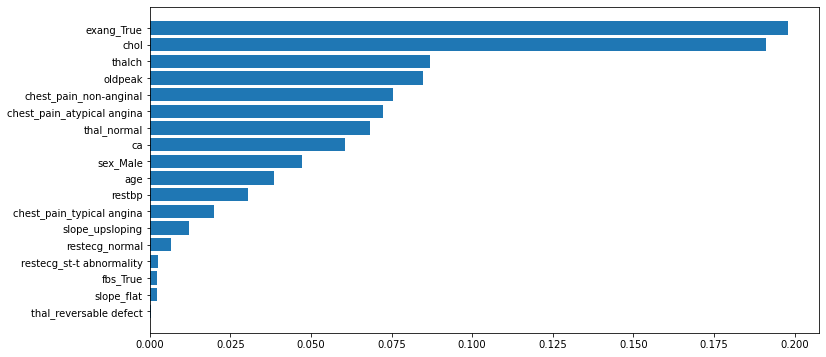

In [682]:
plt.figure(figsize=(12,6))
plt.barh(features.index, features.Importances)

In [683]:
y_pred = gbs.predict(X_test)

In [684]:
gbs_train_score = np.mean(cross_val_score(gbs, X_train, y_train, cv=5, scoring='neg_mean_squared_error' ))
gbs_test_score = np.mean(cross_val_score(gbs, X_test, y_test, cv=5, scoring='neg_mean_squared_error' ))

gbs_acc = accuracy_score(y_pred, y_test)

gbs_train_score, gbs_test_score,gbs_acc

(-0.1621212121212121, -0.23636363636363633, 0.8363636363636363)

In [609]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        73
           1       0.84      0.88      0.86        92

    accuracy                           0.84       165
   macro avg       0.84      0.83      0.83       165
weighted avg       0.84      0.84      0.84       165



/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


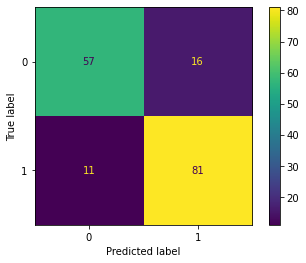

In [610]:
plot_confusion_matrix(gbs,X_test,y_test)

# Logistic regression

In [456]:
from sklearn.preprocessing import StandardScaler

In [457]:
X_train.head()

,age,restbp,chol,thalch,oldpeak,ca,sex_Male,chest_pain_atypical angina,chest_pain_non-anginal,chest_pain_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
239,42,120.0,295.0,162.0,0.0,0.0,1,1,0,0,0,1,0,0,0,1,1,0
721,44,130.0,209.0,127.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,1,0
673,59,135.0,0.0,115.0,1.0,0.0,1,0,0,0,0,1,0,1,1,0,0,1
345,40,130.0,215.0,138.0,0.0,0.0,1,0,1,0,0,1,0,0,1,0,1,0
299,68,144.0,193.0,141.0,3.4,1.0,1,0,0,0,1,1,0,0,1,0,0,1


In [695]:
X_train.shape

(660, 18)

In [696]:
ct = ColumnTransformer(transformers=[('st',StandardScaler(),[0,1,2,3,4,5])],
                      remainder='passthrough')

In [697]:
x_temp = ct.fit_transform(X_train)

In [698]:
x_temp.shape

(660, 18)

In [699]:
X_test_transformed = ct.transform(X_test)

In [700]:
lg = LogisticRegression()

In [701]:
lg.fit(x_temp, y_train)

LogisticRegression()

In [702]:
y_pred = lg.predict(X_test_transformed)

In [703]:
accuracy_score(y_test, y_pred)

0.8242424242424242

In [704]:
#hyperparameter tuning for Logistic Regression model

In [705]:
param_grid = {'penalty' : ['l2'],
              'C' : [0.5,1.0],
              'solver':['lbfgs'],
              'max_iter':[100,110,120]
             }

param_grid1 = {'penalty' : ['l2', 'l1'],
              'C' : [0.5,1.0],
              'solver':['saga'],
             }

In [706]:
gd = GridSearchCV(lg, param_grid=param_grid, cv=5, scoring='accuracy')

In [707]:
gd.fit(x_temp, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0], 'max_iter': [100, 110, 120],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='accuracy')

In [708]:
gd.best_params_

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [709]:
gd.best_score_

0.8257575757575758

In [710]:
y_pred = gd.predict(X_test_transformed)

In [711]:
accuracy_score(y_pred, y_test)

0.8121212121212121

In [688]:
roc_curve(y_test, y_pred)

(array([0.        , 0.21917808, 1.        ]),
 array([0.        , 0.88043478, 1.        ]),
 array([2, 1, 0]))

In [181]:
#final model with best params

In [691]:
# lg = LogisticRegression(penalty='l2',C=1.0)
lg = LogisticRegression(penalty='l2',C=0.5,max_iter= 100,solver='lbfgs')

In [692]:
lg.fit(x_temp, y_train)

LogisticRegression(C=0.5)

In [693]:
y_pred = lg.predict(X_test_transformed)

In [694]:
lg_train_score = np.mean(cross_val_score(lg, x_temp, y_train, cv=5, scoring='neg_mean_squared_error' ))
lg_test_score = np.mean(cross_val_score(lg, X_test_transformed, y_test, cv=5, scoring='neg_mean_squared_error' ))

lg_acc = accuracy_score(y_pred, y_test)

lg_train_score, lg_test_score,lg_acc

(-0.17424242424242425, -0.24848484848484853, 0.8121212121212121)

# SVM

In [712]:
sv = SVC()

In [713]:
sv.fit(x_temp, y_train)

SVC()

In [714]:
y_pred = sv.predict(X_test_transformed)

In [715]:
accuracy_score(y_test, y_pred)

0.8303030303030303

In [716]:
param_grid = {'C':[0.5,1.0],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
             }

In [717]:
gd = GridSearchCV(sv, param_grid=param_grid, cv=5)

In [718]:
gd.fit(x_temp, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [719]:
gd.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [720]:
gd.best_score_

0.8333333333333334

In [721]:
#final model with best params

In [722]:
# sv = SVC(C= 1.0, kernel='rbf', probability=True)
sv = SVC(C= 1.0, kernel='rbf')

In [723]:
sv.fit(x_temp, y_train)

SVC()

In [724]:
y_pred = sv.predict(X_test_transformed)

In [725]:
sv_train_score = np.mean(cross_val_score(sv, x_temp, y_train, cv=5, scoring='neg_mean_squared_error' ))
sv_test_score = np.mean(cross_val_score(sv, X_test_transformed, y_test, cv=5, scoring='neg_mean_squared_error' ))

sv_acc = accuracy_score(y_pred, y_test)

sv_train_score, sv_test_score,sv_acc

(-0.16666666666666666, -0.21818181818181817, 0.8303030303030303)

# accuracy score of all the models

In [628]:
models = ['Decision_Tree','Random_Forest','Gradient_Boost','Logistic_Regression','SVC']
accuracy = [dt_acc,rf_acc,gbs_acc,lg_acc,sv_acc]
roc_train_score = [dt_train_score,rf_train_score,gbs_train_score,lg_train_score,sv_train_score]
roc_test_score = [dt_test_score,rf_test_score,gbs_test_score,lg_test_score,sv_test_score]



In [629]:
variance = [item1 - item2 for (item1,item2) in zip(roc_train_score,roc_test_score)]
variance

[0.08030303030303032,
 0.04999999999999999,
 0.07424242424242422,
 0.06060606060606055,
 0.051515151515151514]

# Accuracy of all models based on 'accuracy_score' metric

In [630]:
pd.DataFrame(zip(models,accuracy), columns=['Model','Accuracy']).set_index('Model')

,Accuracy
Model,
Decision_Tree,0.775758
Random_Forest,0.818182
Gradient_Boost,0.836364
Logistic_Regression,0.824242
SVC,0.830303


# Train and Test score of models based on 'Negative Mean Squared Eroor' metric and variance b/w train and test score

In [631]:
pd.DataFrame(zip(models,roc_train_score,roc_test_score,variance),
             columns=['Model','NMSE Train Score','NMSE Test Score','Variance']).set_index('Model')

,NMSE Train Score,NMSE Test Score,Variance
Model,,,
Decision_Tree,-0.204545,-0.284848,0.080303
Random_Forest,-0.174242,-0.224242,0.050000
Gradient_Boost,-0.162121,-0.236364,0.074242
Logistic_Regression,-0.175758,-0.236364,0.060606
SVC,-0.166667,-0.218182,0.051515


## roc curve for all the models

In [632]:
threshold = [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.02,0.01,0]
y_pred_1 = []
th = []
#decision tree
tpt_lg = []
fpt_lg = []
# fnt = []
#random forest
tpr_lg = []
fpr_lg = []
# fnr = []
#gradient boosting
tpg_lg = []
fpg_lg = []
# fng = []
#logistic regression
tpl_lg = []
fpl_lg = []
# fnl = []
#SVM
tps_lg = []
fps_lg = []
    
for i in threshold:
    th.append(i)
# decision tree
    prob_of_1 = dt.predict_proba(X_test)[:,1]
    ypred=[0 if x<i else 1 for x in prob_of_1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
#true positive rate , false positive rate
    tpt_lg.append(tp/(tp+fn))
    fpt_lg.append(fp/(fp+tn))
    
# random forest
    prob_of_1 = rf.predict_proba(X_test)[:,1]
    ypred=[0 if x<i else 1 for x in prob_of_1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
#true positive rate , false positive rate
    tpr_lg.append(tp/(tp+fn))
    fpr_lg.append(fp/(fp+tn))
    
# gradient boosting
    prob_of_1 = gbs.predict_proba(X_test)[:,1]
    ypred=[0 if x<i else 1 for x in prob_of_1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
#true positive rate , false positive rate
    tpg_lg.append(tp/(tp+fn))
    fpg_lg.append(fp/(fp+tn))
    
#Logistic Regression model
    prob_of_1 = lg.predict_proba(X_test_transformed)[:,1]
    ypred=[0 if x<i else 1 for x in prob_of_1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
#true positive rate , false positive rate
    tpl_lg.append(tp/(tp+fn))
    fpl_lg.append(fp/(fp+tn))
    
#SVM model
    prob_of_1 = sv.predict_proba(X_test_transformed)[:,1]
    ypred=[0 if x<i else 1 for x in prob_of_1]
    
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
#true positive rate , false positive rate
    tps_lg.append(tp/(tp+fn))
    fps_lg.append(fp/(fp+tn))

# for heart disease we want a model which makes less type 2 error i.e high recall value model 

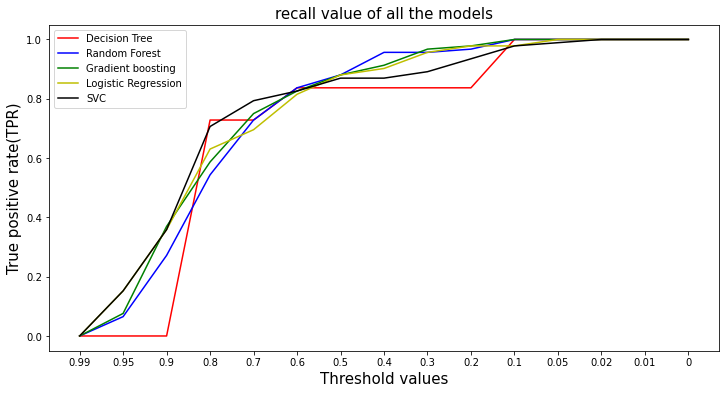

In [633]:
plt.figure(figsize=(12,6))
plt.plot(range(0,15), tpt_lg, color='r',label='Decision Tree')
plt.plot(range(0,15), tpr_lg, color='b',label='Random Forest')
plt.plot(range(0,15), tpg_lg, color='g',label='Gradient boosting')
plt.plot(range(0,15), tpl_lg, color='y',label='Logistic Regression')
plt.plot(range(0,15), tps_lg, color='black',label='SVC')
plt.xticks(range(0,15), [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.02,0.01,0])
plt.xlabel('Threshold values', fontsize=15)
plt.ylabel('True positive rate(TPR)', fontsize=15)
plt.title('recall value of all the models',fontsize=15)
plt.legend();

# ROC Curve

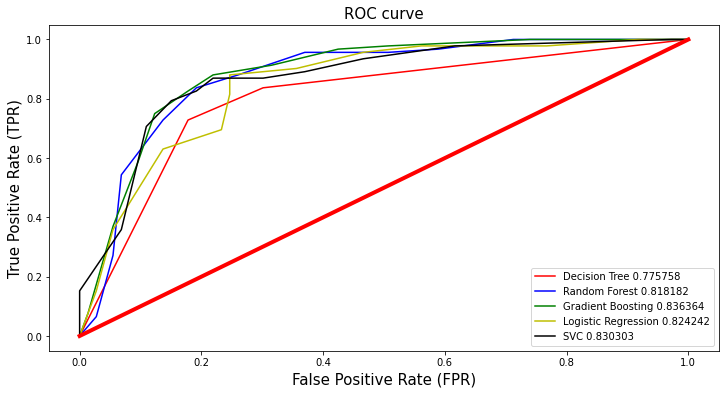

In [635]:
plt.figure(figsize=(12,6))
plt.plot(fpt_lg, tpt_lg, color='r',label='Decision Tree %f'%dt_acc)
plt.plot(fpr_lg, tpr_lg, color='b', label='Random Forest %f'%rf_acc)
plt.plot(fpg_lg, tpg_lg, color='g', label='Gradient Boosting %f'%gbs_acc)
plt.plot(fpl_lg, tpl_lg , color='y', label='Logistic Regression %f'%lg_acc)
plt.plot(fps_lg, tps_lg , color='black', label='SVC %f'%sv_acc)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.title('ROC curve',fontsize=15)
plt.legend()

# Conclusion

# Here we have used 5 Models:
1. Decision Tree
2. Random Forest
3. Gradient Boosting
4. Logistic Regression
5. SVM
  

First EDA is performed on the data using graphs and relation between different features is shown using matplolib and
seaborn libarary . then the features wich are not important for prediction are dropped and null values which are 
mainly present in catagorical columns are replced with most frequent values. 


Here we are using all the 16 features to train the models and feature importance is shown in a graph of the best
performing model 'GradientBoosting'

One hot encoding is performed on the categorical columns to encode them and feature scaling is done for numerical columns
especially for models like logistic regression and SVM 

In order to train the model first data is divided into training and test set and models are trained with default 
parameters only


Hyperparameter tunning is done using GridSearchCV and model's accuracy score is calculated 
using cross validation score on both training and test set with k-fold as 5 and mean is calculated 
of the folds

Hyperparameter tuning is done forDecision Tree for Learning rate i.e alpha value is calculated for Decision tree in 
order to prune the tree to get better test results and low variance model

In order to compare the performance of all the models , accuracy_score , train and test scores
are shown using 'Negative_mean_squared_error' metric 

for predicting the heart disease we want our model to have high Recall scrore i.e high TPR, so next we have calculated
TPR of all the models corresponding to different threshold values which is shown in the graph above so that 
we can choose good threshold value to classify the classes

Finally to show the comparision ROC AUC curve of all the models is shown as above corresponding to different
threshold values

In this dataset Gradient Boosting and SVC models are performing better than others with almost 83% accuracy, 

